### van Genuchten-Mualemの不飽和透水係数予測モデル  
M. TH. Van Genuchten: A closed-form equation for predicting the hydraulic conductivity of unsaturated soils, Soil science society of America journal, vol.44, pp892-898, 1980


In [1]:
import numpy as np
import matplotlib.pyplot as plt

#### 平衡含水率・不飽和透水係数を求めるモデル  
$\theta$：飽和度[-]  
$K_l$：比透水係数  
$h$：水頭高さ　or　水分化学ポテンシャル  
$\alpha, l, m, n$：任意の定数  

文中式(3)　$\theta = [\frac{1}{1+(\alpha h)^n}]^m　$  

文中式(8)　$K_l = \theta ^{1/2}[1-(1-\theta^{1/m})^m]^2$  

※論文より、$l=2, m = 1-1/n$である

In [2]:
def getSl( Alfa, Miu, m, n ):
    return ( 1.0 + ( -Alfa * Miu )**n )**(-m)

def getKl(Alfa,Miu,m,n,l):
    return ( getSl( Alfa, Miu, m, n )**l ) * ( ( 1.0 - ( 1.0 - getSl( Alfa, Miu, m, n )**(1.0/m) )**m )**2.0 )

#### 含水率のポテンシャル微分　・　不飽和度からポテンシャルへの変換　
$\theta_s$：空隙率  
$\theta_r$：残留含水率(residual water content)　※計算では0とした

文中式(23)　$\frac{d\theta}{dh} = \frac{-\alpha m(\theta_s-\theta_r)}{1-m}\theta^{1/m}(1-\theta^{1/m})^m$  

文中式(24)　$h = \frac{1}{\alpha}(\theta^{-1/m}-1)^{1/n}$  

In [3]:
def getDPhi( Phimax, Alfa, Miu, m, n ):
    Sl = getSl( Alfa, Miu, m, n )
    DPhi = -( Alfa * m * Phimax ) / ( 1.0 - m ) * ( Sl**(1.0/m) ) * ( ( 1.0 - Sl**(1.0/m) )**m )
    return np.abs( DPhi )

def getMiu( Phimax, Phi, Alfa, m, n ):
    Sl = Phi / Phimax
    return - ( ( ( Sl**(-1.0/m) ) - 1.0 )**(1.0/n) ) / Alfa

#### 透水係数、含水率への変換  
$\rho$：溶液の密度[kg/m3]  
$g$：重量加速度[m/s]  
$K_{sat}$：飽和透水係数  
$\lambda^{'}_{\mu l}$：水分化学ポテンシャル勾配に対する液相水分伝導率  
$\phi_{max}$：空隙率[-]  
$\phi$：含水率[-]  

$\lambda^{'}_{\mu l} = K_{sat}*K_l*\frac{\rho}{g}$  

$\phi = \theta\phi_{max}$

In [4]:
def getLamdml( Ksat, Alfa, Miu, m, n, l ):
    Kl = getKl(Alfa,Miu,m,n,l)
    row = 1000.0        #塩溶液では密度変わるのでは
    g = 9.8
    return Ksat * Kl * row / g

def getPhi( Phimax, Alfa, Miu, m, n ):
    Sl = getSl( Alfa, Miu, m, n )
    return Phimax * Sl

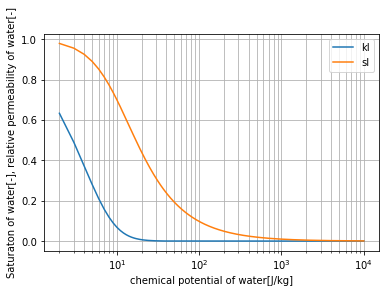

In [5]:
# チェック
###     van-Genuchten用情報    ##########
alfa = 10.0/98.0
n    = 2.0
m    = 1.0 -(1.0/n)
l    = 0.5

### 各ポテンシャルごとの飽和度・比透水係数計算
miu = np.arange(-10000,-1.0,1.0)
sl  = getSl(alfa, miu, m, n)
kl  = getKl(alfa,miu,m,n,l)

# 表示
plt.grid(which="both")
plt.xscale("log")
plt.plot(-miu,kl, label="kl")
plt.plot(-miu,sl, label="sl")
plt.xlabel("chemical potential of water[J/kg]")
plt.ylabel("Saturaton of water[-], relative permeability of water[-]")
plt.legend(loc="upper right")
plt.show()